In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
path.ls()

(#3) [Path('/Users/wangjuntham/.fastai/data/mnist_sample/valid'),Path('/Users/wangjuntham/.fastai/data/mnist_sample/labels.csv'),Path('/Users/wangjuntham/.fastai/data/mnist_sample/train')]

In [4]:
(path/'train').ls()


(#2) [Path('/Users/wangjuntham/.fastai/data/mnist_sample/train/7'),Path('/Users/wangjuntham/.fastai/data/mnist_sample/train/3')]

In [5]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [6]:
#image_3_path = threes[0]

In [7]:
#image_3_sample = Image.open(image_3_path)
#image_3_sample

In [8]:
#tensor(image_3_sample)[4:10, 4:10]

In [9]:
#import pandas as pd

In [10]:
#df = pd.DataFrame(tensor(image_3_sample)[4:15, 4:22])
#df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

In [11]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

In [12]:
len(seven_tensors), len(three_tensors)

(6265, 6131)

<Axes: >

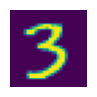

In [13]:
show_image(three_tensors[1])

In [14]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [15]:
stacked_threes.shape

torch.Size([6131, 28, 28])

<Axes: >

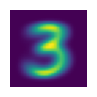

In [16]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

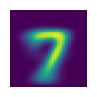

In [17]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

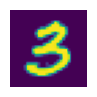

In [18]:
chosen_3 = stacked_threes[42]
show_image(chosen_3)

In [19]:
distance_absolute_3 = (chosen_3 - mean3).abs().mean()
distance_absolute_3

tensor(0.1210)

In [20]:
distance_squared_3 = ((chosen_3 - mean3)**2).mean().sqrt()
distance_squared_3

tensor(0.2216)

In [21]:

distance_absolute_7 = (chosen_3 - mean7).abs().mean()
distance_absolute_7

tensor(0.1769)

In [22]:
distance_squared_7 = ((chosen_3 - mean7)**2).mean().sqrt()
distance_squared_7

tensor(0.3294)

In [25]:
distance_absolute_3, distance_squared_3

(tensor(0.1210), tensor(0.2216))

In [26]:
distance_absolute_7, distance_squared_7

(tensor(0.1769), tensor(0.3294))

In [27]:
import torch.nn.functional as F
F.l1_loss(chosen_3, mean3), F.mse_loss(chosen_3, mean3)

(tensor(0.1210), tensor(0.0491))

In [29]:
F.l1_loss(chosen_3, mean7), F.mse_loss(chosen_3, mean7)

(tensor(0.1769), tensor(0.1085))